In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from skimage import io

(720, 1280, 3)


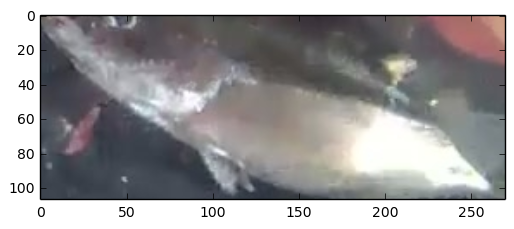

In [18]:
img_path ="img_00003.jpg"

img = io.imread("../input/train/ALB/" + img_path)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
print img.shape
ax.imshow(img[342:449, 825:1095, :])

(720, 1280, 3)


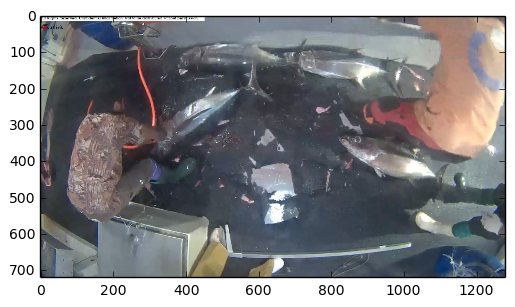

In [19]:
img = io.imread("../input/train/ALB/" + img_path)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
print img.shape
ax.imshow(img)

In [16]:
import numpy as np
import cv2
import json
import glob
import os
import urllib2

LABELS_DIR = '../input/json/'
TRAIN_DIR  = '../input/train/'
# Be used to train the CNN model
OUTPUT_DIR = '../input/train_labels/'

# Links to labels produced by Nathaniel Shimoni, thanks for the great work!
LABELS_LINKS = [
    'https://www.kaggle.com/blobs/download/forum-message-attachment-files/5373/yft_labels.json',
    'https://www.kaggle.com/blobs/download/forum-message-attachment-files/5374/shark_labels.json',
    'https://www.kaggle.com/blobs/download/forum-message-attachment-files/5375/lag_labels.json',
    'https://www.kaggle.com/blobs/download/forum-message-attachment-files/5376/dol_labels.json',
    'https://www.kaggle.com/blobs/download/forum-message-attachment-files/5377/bet_labels.json',
    'https://www.kaggle.com/blobs/download/forum-message-attachment-files/5378/alb_labels.json',
]

def download_labels():
    if not os.path.isdir(LABELS_DIR):
        os.mkdir(LABELS_DIR)
    
    label_files = glob.glob(LABELS_DIR + '*.json')
    
    label_basenames = [os.path.basename(label_file) for label_file in label_files]

    for link in LABELS_LINKS:
        label_filename = link.split('/')[-1]
        if label_filename in label_basenames:
            print("%s exists!" % label_filename)
            continue
        
        print("Downloading " + label_filename)
        
        f = urllib2.urlopen(link)
        with open(LABELS_DIR + label_filename, 'wb') as local_file:
            local_file.write(f.read())

def make_cropped_dataset():
    label_files = glob.glob(LABELS_DIR + '*.json')
    for file in label_files:
        process_labels(file)

def process_labels(label_file):
    file_name = os.path.basename(label_file)
    class_name = file_name.split("_")[0]
    if not os.path.isdir(OUTPUT_DIR + class_name.upper()):
        os.mkdir(OUTPUT_DIR + class_name.upper())
    print("Processing " + class_name + " labels")
    with open(label_file) as data_file:
        print label_file
        data = json.load(data_file)
#     print ("data: %s" % data)
    for img_data in data:
        img_file = TRAIN_DIR + class_name.upper() + '/' + img_data['filename']
        img = cv2.imread(img_file)
        # We will crop only images with both heads and tails present for cleaner dataset
        if len(img_data['annotations']) >= 2:
            p_heads = (img_data['annotations'][0]['x'], img_data['annotations'][0]['y'])
            p_tails = (img_data['annotations'][1]['x'], img_data['annotations'][1]['y'])
            p_middle = ((p_heads[0] + p_tails[0]) / 2, (p_heads[1] + p_tails[1]) / 2)
            dist = np.sqrt((p_heads[0] - p_tails[0]) ** 2 + (p_heads[1] - p_tails[1]) ** 2)
            offset = 3.0 * dist / 4.0

            img_width = img.shape[1]
            img_height = img.shape[0]
            x_left = max(0, p_middle[0] - offset)
            x_right = min(img_width - 1, p_middle[0] + offset)
            y_up = max(0, p_middle[1] - offset)
            y_down = min(img_height - 1, p_middle[1] + offset)
            x_left, x_right, y_up, y_down = int(x_left), int(x_right), int(y_up), int(y_down)
            img = img[y_up:y_down+1, x_left:x_right+1, :]
            cv2.imwrite(OUTPUT_DIR + class_name.upper() + '/' + img_data['filename'], img)
    print("Process %s finished!" % file_name)

if __name__ == '__main__':
    print("Start to convert ......")
    if not os.path.isdir(OUTPUT_DIR):
        os.mkdir(OUTPUT_DIR)
    download_labels()
    make_cropped_dataset()
    print("Finish to convert ......")

Start to convert ......
Processing lag labels
../input/json/lag_labels.json
Process lag_labels.json finished!
Processing bet labels
../input/json/bet_labels.json
Process bet_labels.json finished!
Processing shark labels
../input/json/shark_labels.json
Process shark_labels.json finished!
Processing alb labels
../input/json/alb_labels.json
Process alb_labels.json finished!
Processing dol labels
../input/json/dol_labels.json
Process dol_labels.json finished!
Processing yft labels
../input/json/yft_labels.json
Process yft_labels.json finished!
Finish to convert ......
